# Loading into DataFrames

In [177]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Basic Exploration 

In [54]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [55]:
train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [56]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None



# Missing Values

There are 891 one total rows.

Age, Cabin, Embarked have missing values.

* Age: 714 out of 891 not missing
* Cabin: 204 out of 891 not missing
* Embarked: 889 out of 891

* are missing values from any group in particular

# Clean

* Clean Embarked column
* Clean Cabin Column
* Clean Name Column


# Next Steps

1. Investigate how each feature correlates to survival
2. Clean appropriately 
3. Make observation 
4. Make decision based on observation 


* Age -- **Note: Some missing values** Also could create age brackets
* Gender
* pclass 
* name --**extract title from name**
* Fare --**could create fare brackets**
* sibsp --**could use this to work out how many family members were on board**
* parch
* embarked --**not fully complete**
* cabin --**drop because very incomplete**
* PassengerID --**drop because it does not contribute to survival**


# Age

drop NaN values

distribution of ages for survived and not survied

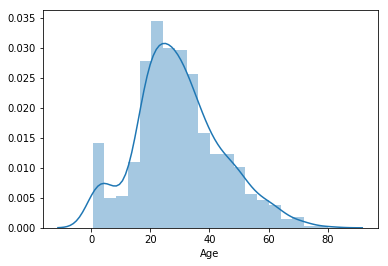

In [57]:
#train.dropna(axis=['Age'], how=['any'])
#train_drop=train.dropna(axis=['Age'])
sns.distplot(train.Age.dropna())           #distplot dosnt like missing values NaN

In [58]:
train.Age.dropna().head()  #here we are manipulating a series 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [59]:
survived.Survived.astype('int8').head()

NameError: name 'survived' is not defined

(183, 12)


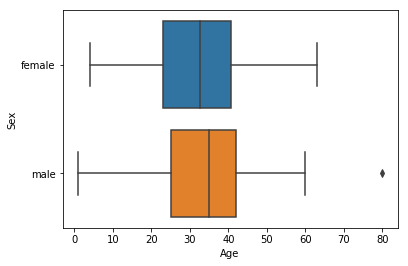

In [60]:
#age_surv=train[['Age'],['Survived']] #why does this not work??

train_drop=train.dropna()#drop all rows with NaN values
print(train_drop.shape) #HOW DO I SPECIFY WHICH COLUMNS TO LOOK AT
#train_drop.
survived_bool=train_drop['Survived']==1 #creates list of bools 
survived=train_drop[survived_bool] #this indexes them and removes the 'False'

survived_not_bool=train_drop['Survived']==0
survived_not=train_drop.loc[survived_not_bool, :]

#print(sns.distplot(train_drop['Age'])) #need to put side by side
#print(sns.distplot(survived_not['Age']))
#print(sns.distplot(survived['Age']))
sns.boxplot(data=survived, x="Age", y="Sex")


Facet Grid

C:\Users\Antonio\Miniconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


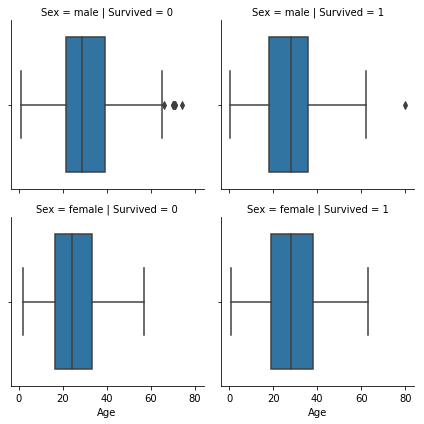

In [61]:
g = sns.FacetGrid(train, col='Survived',row='Sex')
#g.map(plt.hist, 'Age', bins=20)

#g = sns.FacetGrid(train, col='Survived')
g.map(sns.boxplot, 'Age')

## Correlation between discrete variables and survival rate

In [62]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [63]:
train.dropna()
print(train.head(7))
#sns.distplot(train['Age'])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
g=sns.FacetGrid(data=train, col='Embarked',col_order=['C','S','Q'])
g.map(sns.pointplot,'Pclass' ,'Survived', 'Sex', hue_order=None)
g.add_legend(title='Gender')

In [124]:

#train.loc[train.Pclass==1,['Pclass','Age']]



# THIS SPLITS THE STRINGS Method:1

In [229]:
#This lambda function does the same thing as the below
#train['TitleF'] = train['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())


str_split=pd.DataFrame
train.comma=train.Name.str.split(',')

train.split=train.comma.str.get(1)
train.split_1=train.split.str.split('.')
train.title=train.split_1.str.get(0)
print(train.title.value_counts())



 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Capt              1
 Mme               1
 Don               1
 Ms                1
 Sir               1
 Jonkheer          1
 the Countess      1
 Lady              1
Name: Name, dtype: int64


# Splitting using Pattern Method:2

In [228]:
#tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])
train.title2=train.Name.apply(lambda x: re.findall(', [A-z]\w*', x))
train.title2=train.title2.str.get(0)
print(train.title2.value_counts())

, Mr          517
, Miss        182
, Mrs         125
, Master       40
, Dr            7
, Rev           6
, Mlle          2
, Col           2
, Major         2
, the           1
, Don           1
, Sir           1
, Jonkheer      1
, Lady          1
, Capt          1
, Mme           1
, Ms            1
Name: Name, dtype: int64
